In [1]:
from yadage.steering_api import run_workflow

In [2]:
import yaml
with open('ctx.yml','w') as ctx:
    ctx.write(yaml.safe_dump({
                'events':'100'
            }))


In [3]:
%%bash
#empty out the workdir form potential previous runs...
rm -rf /workdir/
ls -lrt /workdir

total 0


rm: cannot remove '/workdir/': Device or resource busy


In [4]:
run_workflow('/workdir','/workdir','pheno_workflows/madgraph_delphes.yml','ctx.yml','from-github')

In [5]:
%%bash
cp /workdir/workflow.gif workflow.gif
#copying because apparently ipython in docker and bound volumes don't play nice together?


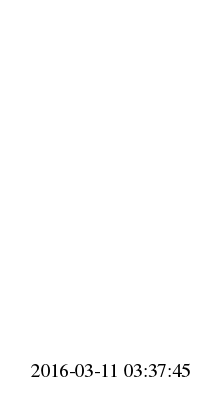

In [6]:
from IPython.display import HTML
import base64
imgstring = base64.b64encode(open('/workdir/workflow.gif').read())
HTML('<img alt="Embedded Image" src="data:image/png;base64,{}" />'.format(imgstring))

In [7]:
!head -n20 /workdir/output.hepmc


HepMC::Version 2.06.09
HepMC::IO_GenEvent-START_EVENT_LISTING
E 0 -1 8.9088610000000003e+01 1.3048209999999999e-01 7.5467709999999999e-03 9999 0 1042 1 2 0 1 1.0000000000000000e+00
N 1 "0" 
U GEV MM
C 9.5916015000000016e+02 9.5916015000000016e+02
F 1 -1 4.7955190411428572e-03 8.4440858085714290e-03 8.9088610000000003e+01 0 0 0 0
V -1 0 0 0 0 0 0 2 0
P 3 1 0 0 3.3568633288000001e+01 3.3568633288000001e+01 0 21 0 0 -3 1 1 501
P 52 -1 2.5144891965719296e+00 5.3424895583904619e-01 1.3243006183183996e+02 1.3245541987646806e+02 3.3000000000000002e-01 43 0 0 -82 1 2 522
V -2 0 0 0 0 0 0 1 0
P 4 -1 0 0 -5.9108600660000000e+01 5.9108600660000000e+01 0 21 0 0 -3 1 2 501
V -3 0 0 0 0 0 0 1 0
P 5 23 0 0 -2.5539967372000000e+01 9.2677233947999994e+01 8.9088606224000003e+01 22 0 0 -40 0
V -4 0 0 0 0 0 0 1 0
P 6 21 0 0 3.0141286951604961e+01 3.0141286951604958e+01 0 31 0 0 -6 2 1 502 2 503
V -5 0 0 0 0 0 0 2 0
P 7 21 0 0 -2.3107273043912420e+00 2.3107273043912429e+00 0 31 0 0 -6 2 1 504 2 502
P 18 2

In [8]:
!pip install wand

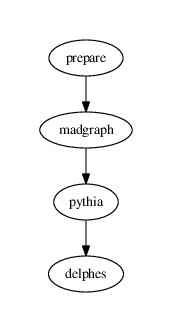

In [9]:
from wand.image import Image as WImage
WImage(filename='/workdir/adage_stages.pdf', resolution=72)

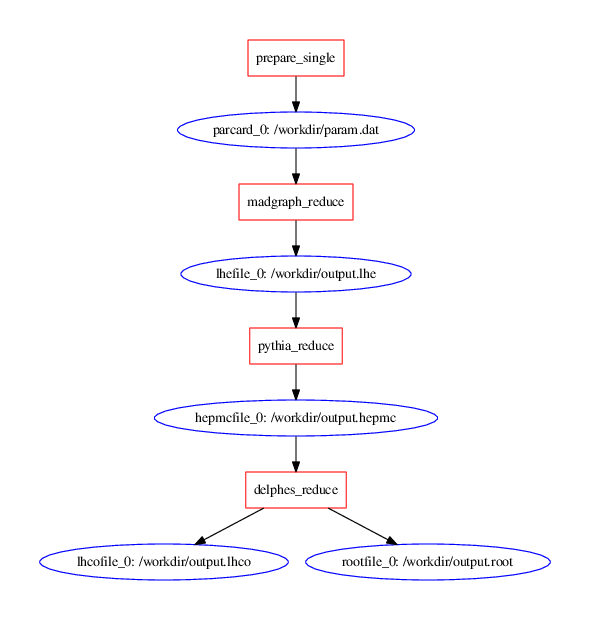

In [10]:
from wand.image import Image as WImage
WImage(filename='/workdir/adage_workflow_instance.pdf', resolution=72)